# __1. Import Packages__

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import skew
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# __2.Dataset Overview__

In [2]:
raw_data = pd.read_csv('Irisdataset.csv')

In [3]:
raw_data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,Class
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
raw_data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
raw_data

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
raw_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data = raw_data.copy(deep=True)

In [9]:
numcols = data.select_dtypes(include=np.number).columns

In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Class           0
dtype: int64

In [11]:
data.duplicated().sum()

3

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
numcols.size

4

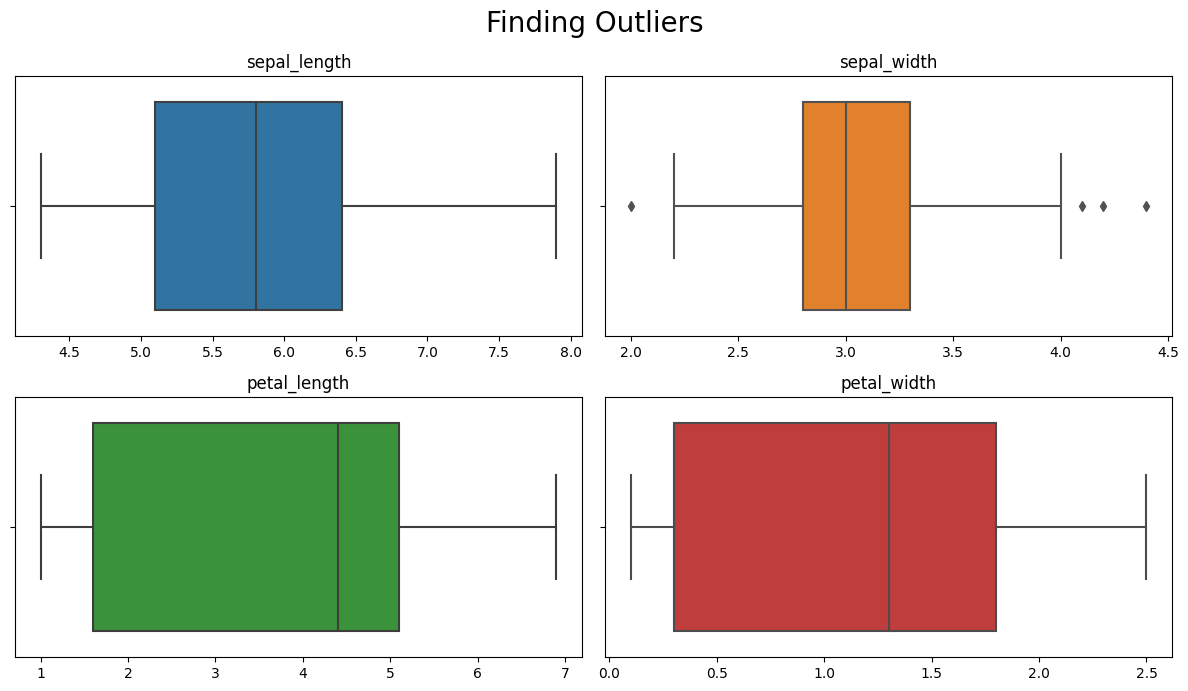

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,7))
axes = axes.flat
for index, column in enumerate(numcols):
    sns.boxplot(
        data=data,
        x=column,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        ax=axes[index]
        )
    axes[index].set_xlabel('')
    axes[index].set_title(column)
plt.suptitle('Finding Outliers', fontsize=20)
plt.tight_layout()

In [15]:
def outliers_iqr(data):
    # Sort the data in ascending order
    data = sorted(data)
    
    # Find the length of the data
    n = len(data)
    
    # Calculate the 25th percentile
    p25 = data[int(n * 0.25)]
    
    # Calculate the 75th percentile
    p75 = data[int(n * 0.75)]
    
    # Calculate the IQR
    iqr = p75 - p25
    
    # Calculate the lower and upper bounds for identifying outliers
    lower_bound = p25 - (iqr * 1.5)
    upper_bound = p75 + (iqr * 1.5)
    
    outliers = []
    
    # Iterate through the data and identify any values that are outside the lower and upper bounds
    for i, value in enumerate(data):
        if value < lower_bound or value > upper_bound:
            outliers.append(i)
    
    return outliers

In [16]:
outliers = []

for column in data[numcols]:
    index = list(outliers_iqr(data[column]))
    outliers.extend(index)

data.drop(outliers, axis=0, inplace=True)

<AxesSubplot: xlabel='Class', ylabel='count'>

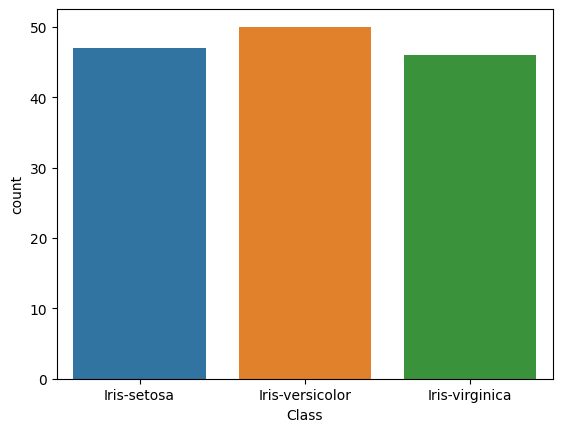

In [17]:
sns.countplot(data=data, x='Class')

In [18]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['Class'] = encode.fit_transform(data.Class.values)

In [29]:
data['Class'].value_counts()

1    50
0    47
2    46
Name: Class, dtype: int64

In [20]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [21]:
X = data.drop(columns='Class')
y = data.Class

In [22]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=4, train_size=0.3)

In [23]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (42, 4)
xtest shape:  (101, 4)
ytrain shape:  (42,)
ytest shape:  (101,)


In [24]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

def select_model_predict(model):
    
    # Training the model
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #Checking Bias-variance tradeoff
    train_accuracy = model.score(xtrain, ytrain)
    test_accuracy = model.score(xtest, ytest)
    
    #Converting Accuracy score into dataframe
    dataframe = pd.DataFrame(
        [train_accuracy*100, test_accuracy*100], 
        index=['Train Accuracy', 'Test Accuracy'], 
        columns=['Value'])
    print(dataframe)
    
    # Classification Report for the model
    report = classification_report(ytest, ypred)
    print(report)
    
    return model

In [25]:
gnb = select_model_predict(GaussianNB())
mnb = select_model_predict(MultinomialNB())
bnb = select_model_predict(BernoulliNB())

                    Value
Train Accuracy  97.619048
Test Accuracy   95.049505
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      0.95      0.94        39
           2       0.93      0.90      0.91        29

    accuracy                           0.95       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.95      0.95      0.95       101

                    Value
Train Accuracy  73.809524
Test Accuracy   61.386139
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.00      0.00      0.00        39
           2       0.43      1.00      0.60        29

    accuracy                           0.61       101
   macro avg       0.48      0.67      0.53       101
weighted avg       0.45      0.61      0.50       101

                    Value
Train Accuracy  40.476190
Test Accuracy   28.712871
    

In [26]:
logr = select_model_predict(LogisticRegression())

                    Value
Train Accuracy  97.619048
Test Accuracy   96.039604
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      0.92      0.95        39
           2       0.90      0.97      0.93        29

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



In [27]:
knc = select_model_predict(KNeighborsClassifier(n_neighbors=5))

                    Value
Train Accuracy  97.619048
Test Accuracy   93.069307
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.85      1.00      0.92        39
           2       1.00      0.76      0.86        29

    accuracy                           0.93       101
   macro avg       0.95      0.92      0.93       101
weighted avg       0.94      0.93      0.93       101



In [28]:
svc = select_model_predict(SVC())

                    Value
Train Accuracy  95.238095
Test Accuracy   95.049505
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      0.95      0.94        39
           2       0.93      0.90      0.91        29

    accuracy                           0.95       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.95      0.95      0.95       101

